# Importing Libraries


In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# Loading Data Set

In [532]:
#using locally stored dataset
#df=pd.read_csv('data/RTA Dataset.csv')

In [533]:
#load the data from the github repo
df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')

In [534]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Exploratory Data Analysis

### <i>Intial Exploration</i>

In [535]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [536]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [537]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
669,9:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),NaN,NaN,...,Going straight,Driver or rider,Male,Under 18,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
8427,7:28:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,NaN,...,Turnover,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury
8109,19:00:00,Friday,18-30,Male,NaN,Employee,5-10yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Female,18-30,3,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
8180,18:36:00,Monday,18-30,Male,Junior high school,Employee,2-5yr,Long lorry,Owner,NaN,...,Getting off,Passenger,Male,Over 51,3,Self-employed,Normal,Not a Pedestrian,Driving at high speed,Slight Injury
2924,18:40:00,Friday,18-30,Male,Junior high school,Owner,5-10yr,Other,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to pedestrian,Serious Injury
7140,22:45:00,Friday,Unknown,Female,Unknown,Employee,Below 1yr,Automobile,Owner,5-10yrs,...,Turnover,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Overtaking,Serious Injury
9991,13:54:00,Saturday,18-30,Male,Junior high school,Employee,Below 1yr,Other,Owner,NaN,...,Getting off,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
2602,17:25:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Organization,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
8019,12:05:00,Thursday,18-30,Male,Writing & reading,Owner,5-10yr,Automobile,Owner,NaN,...,Entering a junction,na,na,na,na,Driver,NaN,Not a Pedestrian,Other,Slight Injury
8310,13:30:00,Monday,Over 51,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,2-5yrs,...,Reversing,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [538]:
df.shape

(12316, 32)

In [539]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [540]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [541]:
df.rename(columns=col_map,inplace=True)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [543]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [544]:
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


<b>Missing Values</b>

In [545]:
df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0]

vehicle_defect             4427
service_year               3928
casualty_work              3198
casualty_fitness           2635
vehicle_type                950
junction_type               887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
vehicle_owner               482
lanes                       385
vehicle_movement            308
accident_area               239
surface_type                172
collision_type              155
road_allignment             142
dtype: int64

In [546]:
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]

vehicle_defect             35.945112
service_year               31.893472
casualty_work              25.966223
casualty_fitness           21.394933
vehicle_type                7.713543
junction_type               7.202014
driving_experience          6.731082
educational_level           6.016564
vehicle_driver_relation     4.701202
vehicle_owner               3.913608
lanes                       3.126015
vehicle_movement            2.500812
accident_area               1.940565
surface_type                1.396557
collision_type              1.258525
road_allignment             1.152972
dtype: float64

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\2844332473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


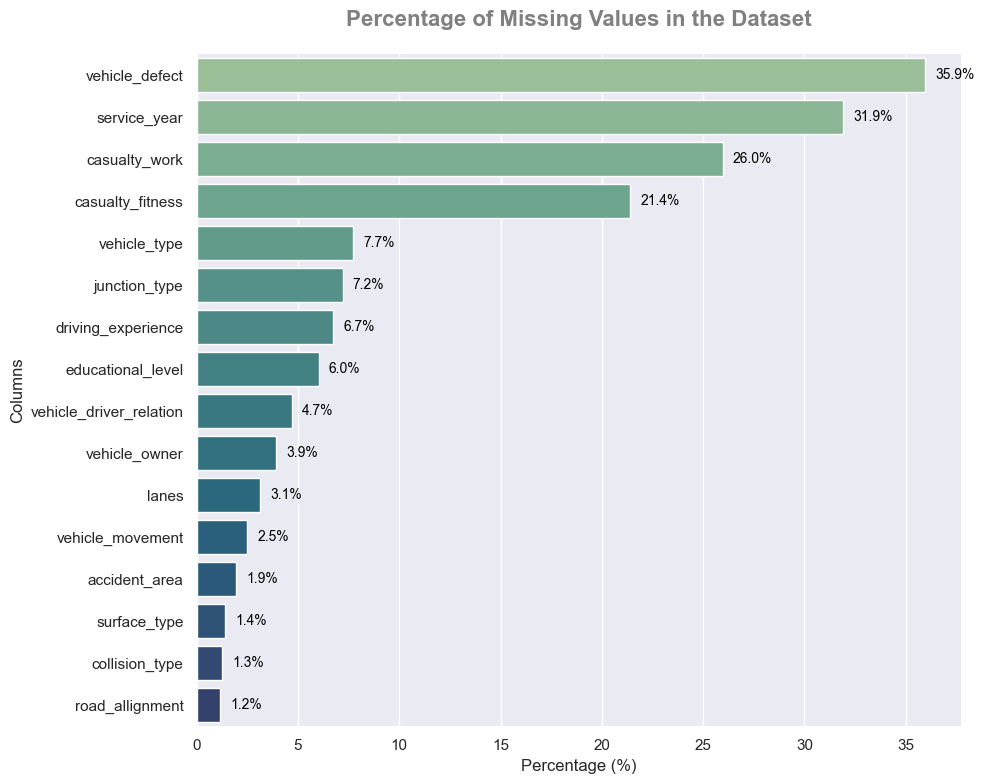

In [547]:
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=missing_data.index,
    x=missing_data.values,
    palette="crest"
)

# Add title and labels
plt.title("Percentage of Missing Values in the Dataset", fontsize=16, fontweight="bold", color="gray", pad=20)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Add percentage annotations on bars
for index, value in enumerate(missing_data.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', ha='left', fontsize=10, color="black")

# Remove legend (not needed)
plt.legend([], [], frameon=False)

# Improve layout and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<b>Missingness</b>

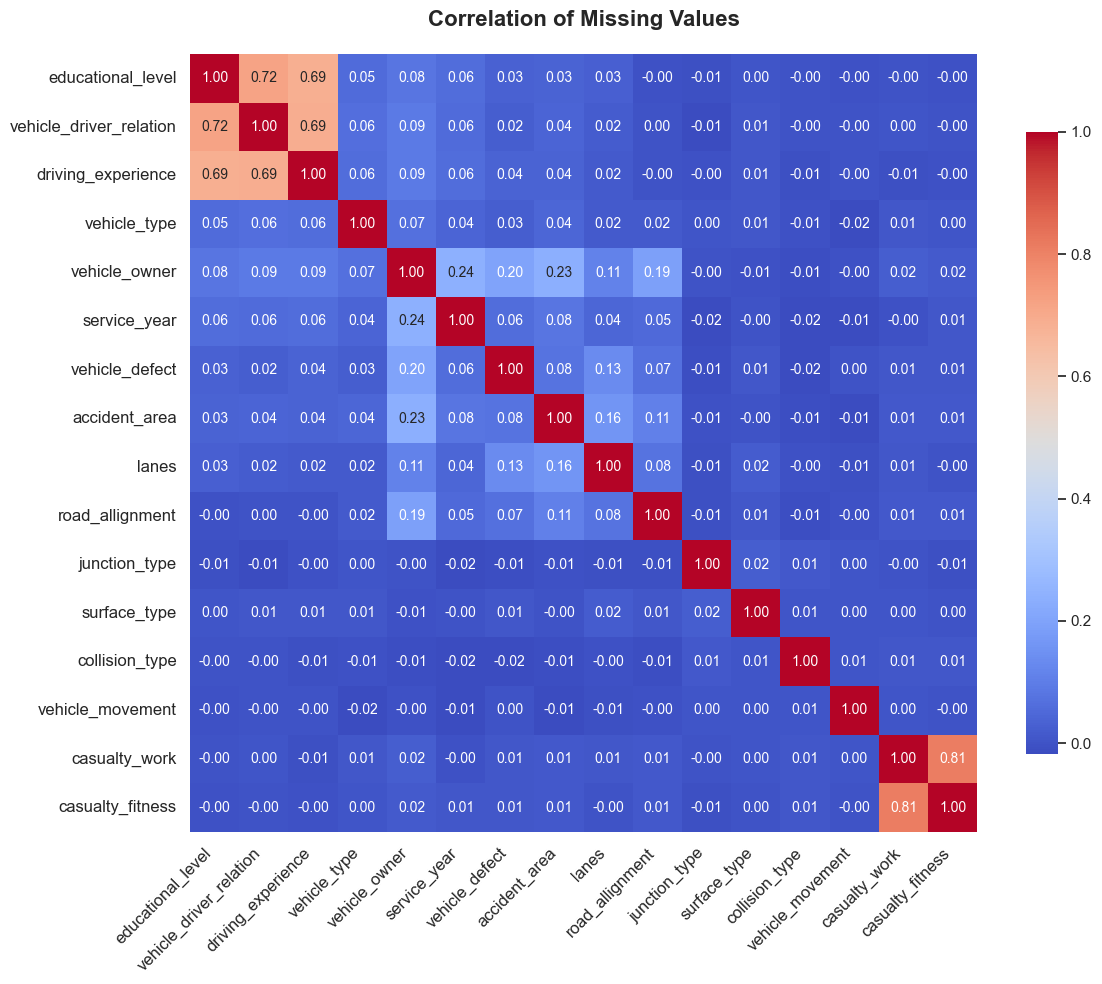

In [548]:
missingness = df.isnull().astype(int)
missingness = missingness.loc[:, (missingness.sum(axis=0) > 0)]
correlation_matrix = missingness.corr()

# Increase plot size and apply Seaborn theme
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust axis labels
plt.title("Correlation of Missing Values", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [549]:
df2=df.copy()

<b>Converting values to numbers</b>

In [550]:
#time
df2['time']=pd.to_datetime(df2['time'],format='%H:%M:%S')
df2['hour']=df2['time'].dt.hour
df2['minute']=df2['time'].dt.minute
df2[['time','hour','minute']].head()

#convert objects to numbers
df2['casualty_severity']=pd.to_numeric(df2['casualty_severity'],errors='coerce')

#drop the time feature
df2.drop(columns=['time'],inplace=True)
df2.dtypes

day_of_week                 object
driver_age                  object
driver_sex                  object
educational_level           object
vehicle_driver_relation     object
driving_experience          object
vehicle_type                object
vehicle_owner               object
service_year                object
vehicle_defect              object
accident_area               object
lanes                       object
road_allignment             object
junction_type               object
surface_type                object
road_surface_conditions     object
light_condition             object
weather_condition           object
collision_type              object
vehicles_involved            int64
casualties                   int64
vehicle_movement            object
casualty_class              object
casualty_sex                object
casualty_age                object
casualty_severity          float64
casualty_work               object
casualty_fitness            object
pedestrian_movement 

In [551]:
#missing in numerical data
df.select_dtypes(exclude=['O']).isna().sum()

vehicles_involved    0
casualties           0
dtype: int64

In [552]:
df2.replace(['na','unknown','Unknown'], np.nan, inplace=True)
for col in df2:
    print(df2[col].unique())

['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' nan]
['Male' 'Female' nan]
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
['Employee' nan 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
['No defect' nan '7' '5']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational 

**Encoding**

In [553]:
#segreggate nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex',
       'vehicle_driver_relation', 'vehicle_type',
       'vehicle_owner', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_fitness',
       'casualty_work', 'pedestrian_movement',
       'accident_cause']
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age', 'accident_severity']
len(nominal_features)+len(ordinal_features)

28

In [554]:
#inspect ordinal feature values
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [555]:
#where casualty_age is equal to 5
df2[df2['casualty_age']==5]['casualty_age'].count()

np.int64(0)

In [556]:
#Nominal Encoding

lencoders={}
for col in nominal_features:
    label_encoder = LabelEncoder()
    non_nan_mask = df2[col].notna()  # Mask for non-NaN values
    col_name=col + '_en'
    df2.loc[non_nan_mask, col_name] = label_encoder.fit_transform(df2.loc[non_nan_mask, col])
    lencoders[col]=label_encoder
    df2[col_name] = df2[col_name].fillna(np.nan)
    df2.drop(columns=[col],inplace=True)
len(df2.columns)

33

In [557]:
#Ordinal Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df2[ordinal_features] = df2[ordinal_features].fillna('missing')
df2[ordinal_features]=encoder.fit_transform(df2[ordinal_features])
missing_encoded_value = encoder.transform([['missing'] * len(ordinal_features)])[0]
for i, col in enumerate(ordinal_features):
     df2[col] = df2[col].replace(missing_encoded_value[i], np.nan)

df2.head()

c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,hour,...,light_condition_en,weather_condition_en,collision_type_en,vehicle_movement_en,casualty_class_en,casualty_sex_en,casualty_fitness_en,casualty_work_en,pedestrian_movement_en,accident_cause_en
0,0.0,0.0,0.0,3.0,2,2,NaN,NaN,2.0,17,...,3.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,5.0,9.0
1,1.0,4.0,3.0,2.0,2,2,NaN,NaN,2.0,17,...,3.0,2.0,7.0,2.0,NaN,NaN,NaN,NaN,5.0,16.0
2,0.0,4.0,0.0,NaN,2,2,1.0,3.0,1.0,17,...,3.0,2.0,2.0,2.0,0.0,1.0,NaN,0.0,5.0,0.0
3,0.0,4.0,2.0,NaN,2,2,0.0,3.0,2.0,1,...,0.0,2.0,7.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0
4,0.0,4.0,1.0,2.0,2,2,NaN,NaN,2.0,1,...,0.0,2.0,7.0,2.0,NaN,NaN,NaN,NaN,5.0,16.0


In [558]:
df2['educational_level'].unique()

array([ 0.,  4., nan,  1.,  2.,  3.,  5.])

### Impute Missing Values

In [559]:
cols_withna=[col for col in df2 if df2[col].isna().sum()>0]
cols_withna

['driver_age',
 'educational_level',
 'driving_experience',
 'service_year',
 'casualty_age',
 'casualty_severity',
 'driver_sex_en',
 'vehicle_driver_relation_en',
 'vehicle_type_en',
 'vehicle_owner_en',
 'vehicle_defect_en',
 'accident_area_en',
 'lanes_en',
 'road_allignment_en',
 'junction_type_en',
 'surface_type_en',
 'weather_condition_en',
 'collision_type_en',
 'vehicle_movement_en',
 'casualty_class_en',
 'casualty_sex_en',
 'casualty_fitness_en',
 'casualty_work_en',
 'accident_cause_en']

In [560]:
# train=df2[]
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
imputer = IterativeImputer(estimator=rf, random_state=0)
imputed_data = imputer.fit_transform(df2)
imputed_df = pd.DataFrame(imputed_data, columns=df2.columns)
imputed_df.head()



c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,hour,...,light_condition_en,weather_condition_en,collision_type_en,vehicle_movement_en,casualty_class_en,casualty_sex_en,casualty_fitness_en,casualty_work_en,pedestrian_movement_en,accident_cause_en
0,0.0,0.0,0.0,3.0,2.0,2.0,0.0,3.0,2.0,17.0,...,3.0,2.0,3.0,2.0,0.0,1.0,2.0,0.0,5.0,9.0
1,1.0,4.0,3.0,2.0,2.0,2.0,0.0,3.0,2.0,17.0,...,3.0,2.0,7.0,2.0,0.0,1.0,2.0,0.0,5.0,16.0
2,0.0,4.0,0.0,3.0,2.0,2.0,1.0,3.0,1.0,17.0,...,3.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,5.0,0.0
3,0.0,4.0,2.0,3.0,2.0,2.0,0.0,3.0,2.0,1.0,...,0.0,2.0,7.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0
4,0.0,4.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,1.0,...,0.0,2.0,7.0,2.0,0.0,1.0,2.0,0.0,5.0,16.0


In [561]:
print(imputed_df.shape)

(12316, 33)


In [562]:
#decoding
# Decode Nominal Features
for col, le in lencoders.items():
    encoded_col = col + '_en'
    imputed_df[col] = le.inverse_transform(imputed_df[encoded_col].astype(int))
    imputed_df.drop(columns=[encoded_col], inplace=True)
imputed_df.sample(10)

,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,hour,...,light_condition,weather_condition,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_fitness,casualty_work,pedestrian_movement,accident_cause
9200,1.0,4.0,2.0,1.0,2.0,1.0,4.0,3.0,2.0,7.0,...,Daylight,Raining,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,No priority to vehicle
6163,3.0,4.0,3.0,2.0,2.0,2.0,0.0,3.0,2.0,21.0,...,Darkness - lights lit,Normal,Collision with pedestrians,Going straight,Driver or rider,Male,Normal,Other,Not a Pedestrian,Changing lane to the right
11554,1.0,5.0,2.0,3.0,2.0,1.0,0.0,3.0,2.0,12.0,...,Darkness - lights lit,Normal,Collision with pedestrians,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Changing lane to the left
2126,0.0,4.0,1.0,1.0,2.0,1.0,0.0,3.0,2.0,22.0,...,Darkness - lights lit,Normal,Collision with pedestrians,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Changing lane to the right
3835,2.0,4.0,1.0,1.0,2.0,1.0,0.0,3.0,2.0,17.0,...,Darkness - lights lit,Normal,Collision with pedestrians,Turnover,Driver or rider,Male,Normal,Driver,Not a Pedestrian,No priority to vehicle
10976,0.0,4.0,1.0,3.0,4.0,5.0,2.0,3.0,2.0,14.0,...,Daylight,Normal,Collision with pedestrians,Other,Driver or rider,Male,Normal,Driver,Not a Pedestrian,No distancing
7244,0.0,4.0,2.0,1.0,1.0,3.0,0.0,3.0,2.0,5.0,...,Darkness - lights lit,Raining,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,No distancing
12002,2.0,4.0,4.0,1.0,3.0,3.0,0.0,3.0,2.0,13.0,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Self-employed,Not a Pedestrian,No distancing
10461,1.0,4.0,3.0,1.0,2.0,2.0,0.0,3.0,2.0,10.0,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Changing lane to the left
4240,0.0,4.0,0.0,1.0,2.0,2.0,0.0,3.0,2.0,12.0,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,No distancing


In [563]:
imputed_df.shape,df2.shape
print("Shape of imputed_encoded_data:", imputed_df.shape)
print("Shape of original encoded_data:", df2.shape)
df2.columns,imputed_df.columns

Shape of imputed_encoded_data: (12316, 33)
Shape of original encoded_data: (12316, 33)


(Index(['driver_age', 'educational_level', 'driving_experience', 'service_year',
        'vehicles_involved', 'casualties', 'casualty_age', 'casualty_severity',
        'accident_severity', 'hour', 'minute', 'day_of_week_en',
        'driver_sex_en', 'vehicle_driver_relation_en', 'vehicle_type_en',
        'vehicle_owner_en', 'vehicle_defect_en', 'accident_area_en', 'lanes_en',
        'road_allignment_en', 'junction_type_en', 'surface_type_en',
        'road_surface_conditions_en', 'light_condition_en',
        'weather_condition_en', 'collision_type_en', 'vehicle_movement_en',
        'casualty_class_en', 'casualty_sex_en', 'casualty_fitness_en',
        'casualty_work_en', 'pedestrian_movement_en', 'accident_cause_en'],
       dtype='object'),
 Index(['driver_age', 'educational_level', 'driving_experience', 'service_year',
        'vehicles_involved', 'casualties', 'casualty_age', 'casualty_severity',
        'accident_severity', 'hour', 'minute', 'day_of_week', 'driver_sex',
      

In [ ]:
# Decode Ordinal Features
ordinal_decoded = encoder.inverse_transform(imputed_df[ordinal_features])
for i, col in enumerate(ordinal_features):
    imputed_df[col] = ordinal_decoded[:, i]
imputed_df

,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,hour,...,light_condition,weather_condition,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_fitness,casualty_work,pedestrian_movement,accident_cause
0,18-30,Above high school,1-2yr,Above 10yr,2.0,2.0,18-30,3.0,Slight Injury,17.0,...,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Moving Backward
1,31-50,Junior high school,Above 10yr,5-10yrs,2.0,2.0,18-30,3.0,Slight Injury,17.0,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Overtaking
2,18-30,Junior high school,1-2yr,Above 10yr,2.0,2.0,31-50,3.0,Serious Injury,17.0,...,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Changing lane to the left
3,18-30,Junior high school,5-10yr,Above 10yr,2.0,2.0,18-30,3.0,Slight Injury,1.0,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,Normal,Driver,Not a Pedestrian,Changing lane to the right
4,18-30,Junior high school,2-5yr,5-10yrs,2.0,2.0,18-30,3.0,Slight Injury,1.0,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Overtaking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Junior high school,2-5yr,2-5yrs,2.0,1.0,18-30,3.0,Slight Injury,16.0,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,Normal,Driver,Not a Pedestrian,No distancing
12312,18-30,Elementary school,5-10yr,2-5yrs,2.0,1.0,18-30,3.0,Slight Injury,18.0,...,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,Normal,Driver,Not a Pedestrian,No distancing
12313,Over 51,Junior high school,5-10yr,2-5yrs,1.0,1.0,31-50,3.0,Serious Injury,13.0,...,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Changing lane to the right
12314,18-30,Junior high school,Above 10yr,2-5yrs,2.0,1.0,18-30,3.0,Slight Injury,13.0,...,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,Normal,Driver,Not a Pedestrian,Driving under the influence of drugs


In [565]:
imputed_df['casualty_class'].isna().sum()
for col in imputed_df:
    print(col ," : ",imputed_df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51']
educational_level  :  ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
service_year  :  ['Above 10yr' '5-10yrs' '2-5yrs' '1-2yr' 'Below 1yr']
vehicles_involved  :  [2. 1. 3. 6. 4. 7.]
casualties  :  [2. 1. 3. 4. 6. 5. 8. 7.]
casualty_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' '5']
casualty_severity  :  [3. 2. 1.]
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']
hour  :  [17.  1. 14. 22.  8. 15. 12. 18. 13. 20. 16. 21.  9. 10. 19. 11. 23.  7.
  0.  5.  6.  4.  3.  2.]
minute  :  [ 2.  6. 15. 30. 20. 40. 45. 10. 11. 36. 35. 25. 57. 50. 12. 19. 38. 39.
 55.  1.  0. 48. 17. 32. 54.  4. 52. 33. 59. 53. 23. 24. 34.  5.  8. 49.
 41. 16.  3. 31. 43. 58. 47. 13. 22. 44. 18. 21. 46.  7. 51. 26. 28.  9.
 56. 29. 27. 42. 37. 14.]
day_of_week  :  ['Monday' 'Sunday' 'Friday

<b>Duplicated Values</b>

In [586]:
print(imputed_df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [587]:
imputed_df.nunique().sort_values(ascending=False)

minute                     60
hour                       24
accident_cause             19
vehicle_type               17
accident_area              13
vehicle_movement           12
pedestrian_movement         9
road_allignment             9
collision_type              9
casualties                  8
weather_condition           8
day_of_week                 7
junction_type               7
casualty_work               6
educational_level           6
vehicles_involved           6
driving_experience          6
lanes                       6
service_year                5
surface_type                5
casualty_fitness            5
casualty_age                5
driver_age                  4
light_condition             4
vehicle_owner               4
road_surface_conditions     4
casualty_severity           3
vehicle_driver_relation     3
accident_severity           3
casualty_class              3
vehicle_defect              3
driver_sex                  2
casualty_sex                2
dtype: int

<b>Distinct Values</b>

In [568]:
uniques=[]
for i in df.columns:
     uniques.append(df[i].unique())
uniques_df=pd.Series(data=uniques,index=df.columns)
uniques_df

time                       [17:02:00, 1:06:00, 14:15:00, 17:30:00, 17:20:...
day_of_week                [Monday, Sunday, Friday, Wednesday, Saturday, ...
driver_age                        [18-30, 31-50, Under 18, Over 51, Unknown]
driver_sex                                           [Male, Female, Unknown]
educational_level          [Above high school, Junior high school, nan, E...
vehicle_driver_relation               [Employee, Unknown, Owner, nan, Other]
driving_experience         [1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Lic...
vehicle_type               [Automobile, Public (> 45 seats), Lorry (41?10...
vehicle_owner                [Owner, Governmental, nan, Organization, Other]
service_year               [Above 10yr, 5-10yrs, nan, 1-2yr, 2-5yrs, Unkn...
vehicle_defect                                        [No defect, nan, 7, 5]
accident_area              [Residential areas, Office areas,   Recreation...
lanes                      [nan, Undivided Two way, other, Double carriag...

array([[<Axes: title={'center': 'vehicles_involved'}>,
        <Axes: title={'center': 'casualties'}>]], dtype=object)

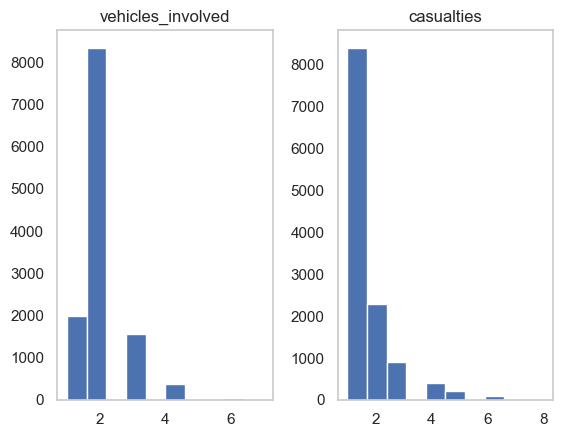

In [569]:
df.hist(grid=False)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

<b>Skewness</b>

In [570]:
count_valu= df['accident_severity'].value_counts()
print(count_valu)

accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


In [571]:
proportions = count_valu / count_valu.sum()
print(proportions)


accident_severity
Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: count, dtype: float64


In [572]:
cv = np.std(proportions) / np.mean(proportions)
print(f"Coefficient of Variation: {cv}")

Coefficient of Variation: 1.09815368128082


<Axes: title={'center': 'Category Proportions'}, xlabel='accident_severity'>

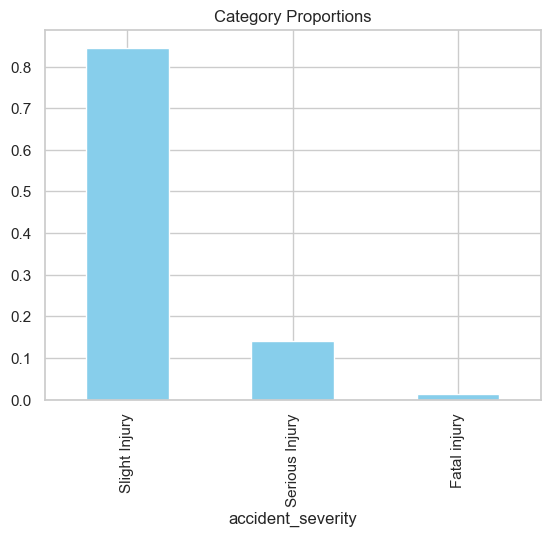

In [573]:
proportions.plot(kind='bar', color='skyblue', title='Category Proportions')

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\1214894584.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_valu)


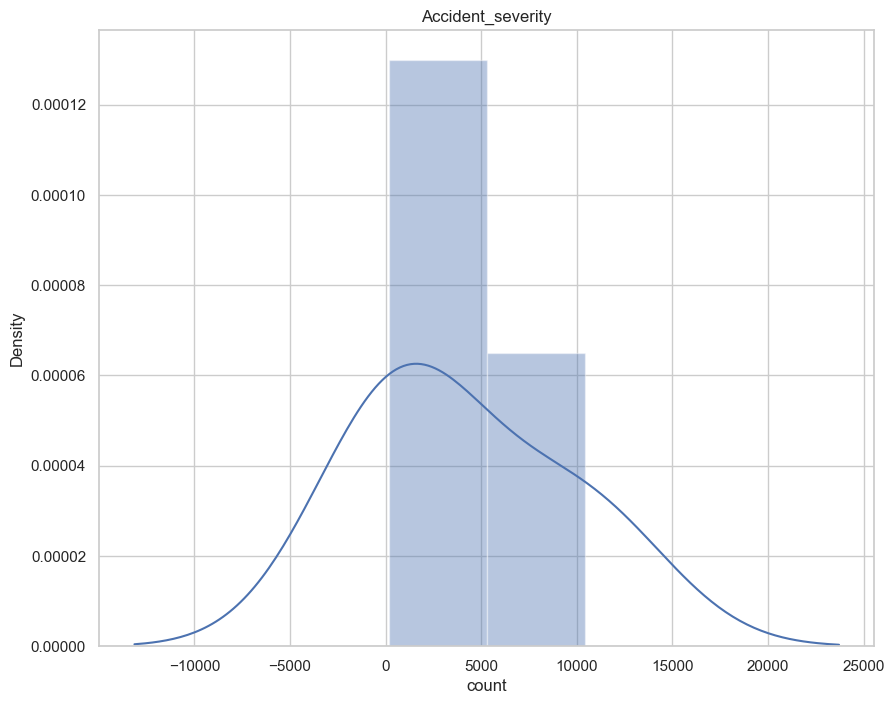

In [574]:
plt.figure(figsize= (10,8))
sns.distplot(count_valu)
plt.title("Accident_severity")
plt.show()

### <i>Univariate Analysis</i>

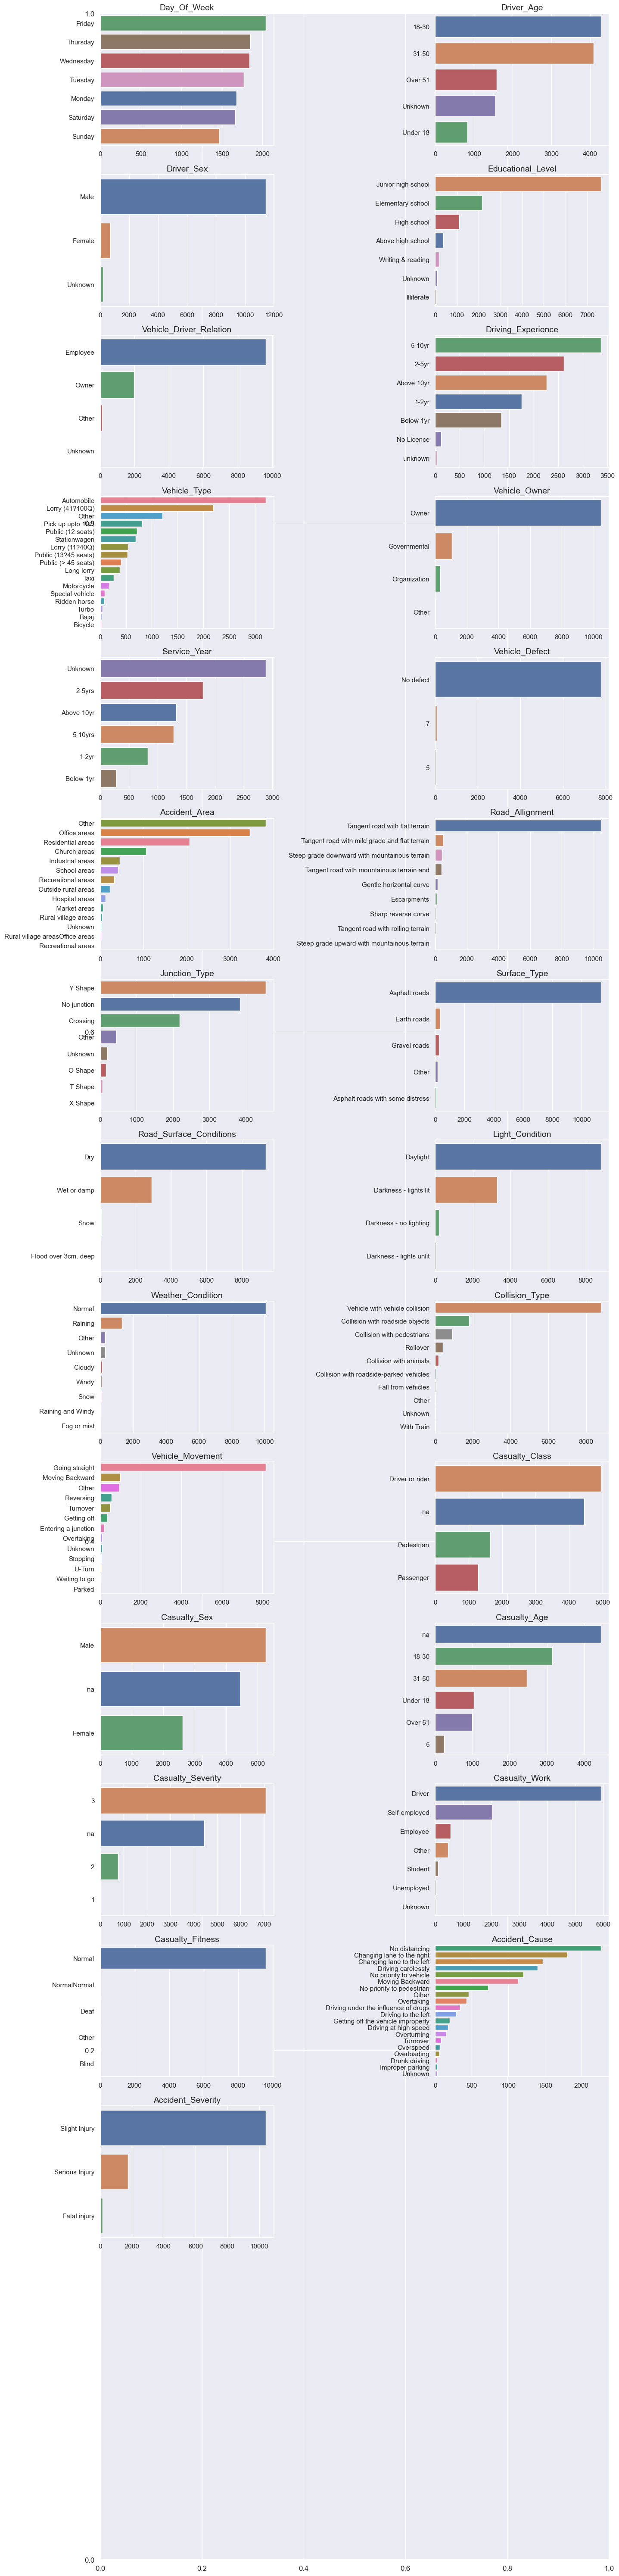

In [575]:
plt.figure(figsize=(15,60))
sns.set_style("darkgrid")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plotnumber=1
for col in df.drop(['pedestrian_movement','lanes','time','casualties','vehicles_involved'],axis=1):
    ax1 = plt.subplot(16,2,plotnumber)
    if plotnumber <= df.shape[1]:
        order=df[col].value_counts().index.tolist()
        sns.countplot(data=df,y=col,hue=col,legend=False,order=order)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(col.title(),fontsize=14)
    plotnumber+=1
plt.tight_layout()

<i>Accident distribution through out the week days<i>

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\3799638487.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=cat_order,legend=False,ax=axes[1],color='skyblue')


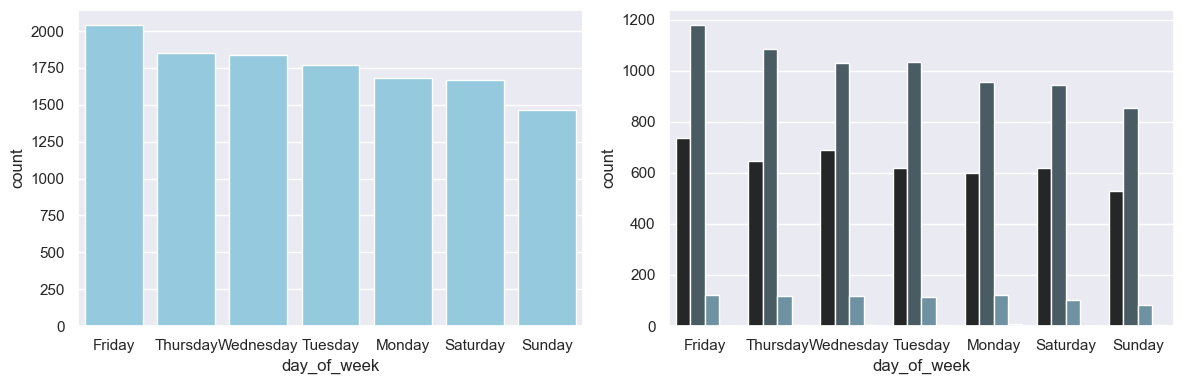

In [576]:
#Weekdays and accidents
date_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# plt.annotate()
cat_order=df['day_of_week'].value_counts().index
sns.countplot(data=df,x='day_of_week',ax=axes[0],order=cat_order,color='skyblue')
# plt.gca().invert_yaxis()
sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=cat_order,legend=False,ax=axes[1],color='skyblue')
plt.tight_layout()


C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\1311010231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, y='hour',palette = 'Dark2',order=order,gap=0)


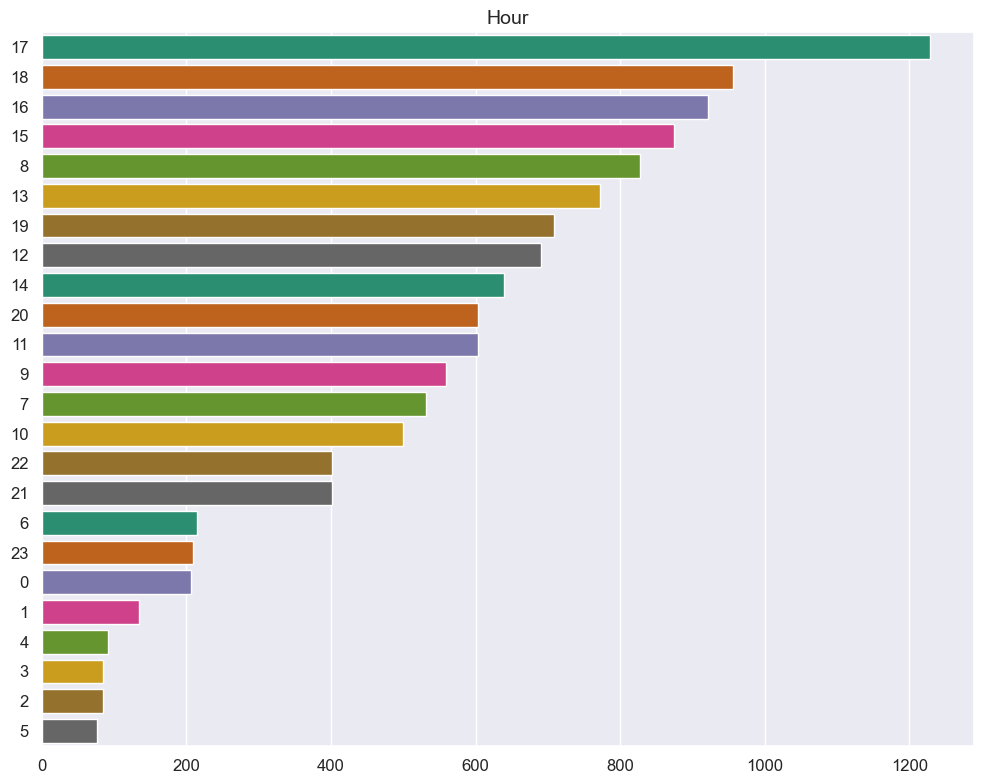

In [577]:
plt.figure(figsize=(10,8))
order=df2['hour'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df2, y='hour',palette = 'Dark2',order=order,gap=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\2916528416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)


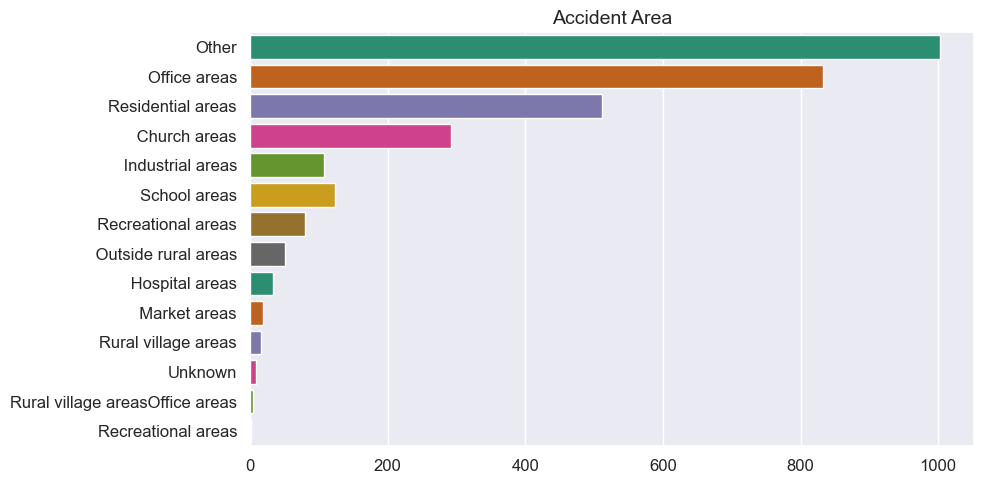

In [578]:
plt.figure(figsize=(10,5))
df_weekend=df[df['day_of_week'].isin(['Saturday','Sunday'])]
order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Accident Area

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\143074294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)


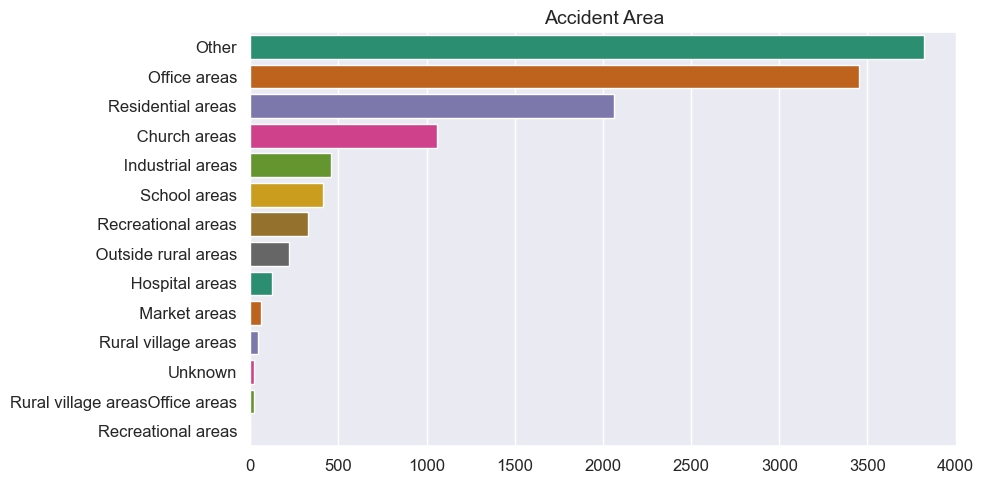

In [579]:
plt.figure(figsize=(10,5))
order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\3669694929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)


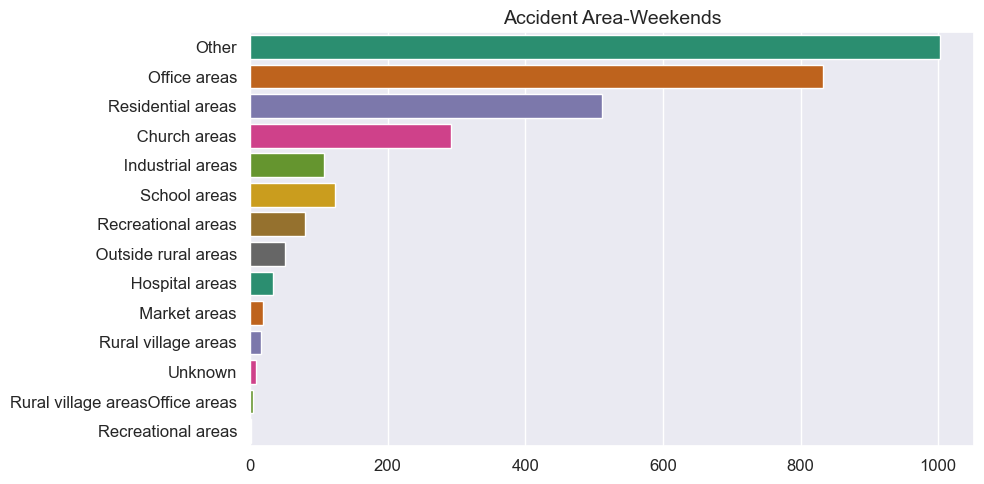

In [580]:
plt.figure(figsize=(10,5))

order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area-Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\721704253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='lanes', palette = 'Dark2',order=order)


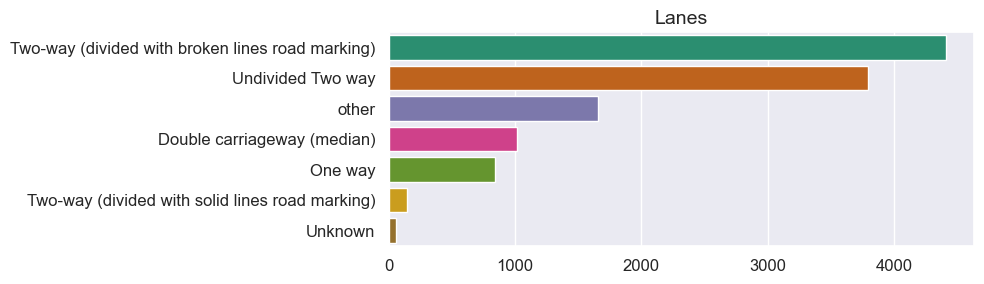

In [581]:
plt.figure(figsize=(10,3))
order=df['lanes'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='lanes', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10984\343839610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='driver_sex', palette = 'Dark2',order=order)


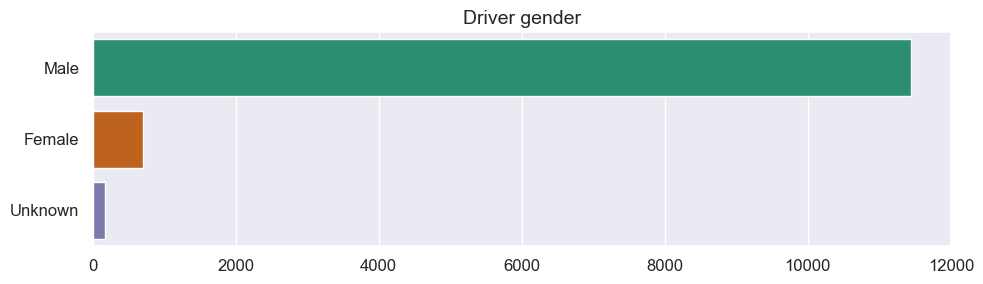

In [582]:
plt.figure(figsize=(10,3))
order=df['driver_sex'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='driver_sex', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Driver gender', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### <i>Bivariate Analysis</i>

### <i>Multivariate Analysis</i>

In [583]:
df2.corr()

,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,hour,...,light_condition_en,weather_condition_en,collision_type_en,vehicle_movement_en,casualty_class_en,casualty_sex_en,casualty_fitness_en,casualty_work_en,pedestrian_movement_en,accident_cause_en
driver_age,1.000000,0.005366,-0.019728,-0.000030,-0.012614,0.023865,-0.002045,0.003043,-0.035009,0.009401,...,0.024794,0.007995,-0.006090,-0.003889,-0.017749,0.003646,-0.000570,0.014873,0.010292,0.009383
educational_level,0.005366,1.000000,0.042615,0.006467,0.014322,0.004007,0.000611,-0.008443,-0.000406,-0.004284,...,-0.002172,0.003768,-0.013774,0.007649,-0.005501,-0.004019,-0.000335,0.021349,-0.000510,-0.001816
driving_experience,-0.019728,0.042615,1.000000,0.018636,-0.009489,-0.007345,-0.014700,-0.002740,0.002393,-0.007881,...,-0.018557,-0.010977,0.011552,0.006110,0.004527,0.012552,0.007920,0.020474,-0.018908,-0.008949
service_year,-0.000030,0.006467,0.018636,1.000000,-0.010842,0.011215,-0.004414,0.026194,-0.005918,0.017101,...,0.002846,-0.007130,0.002973,-0.005306,-0.010601,-0.008185,0.001660,0.017021,-0.026709,-0.007601
vehicles_involved,-0.012614,0.014322,-0.009489,-0.010842,1.000000,0.213427,-0.010476,0.013986,0.096023,0.023095,...,0.030009,-0.029861,0.006223,-0.008748,-0.004396,-0.001384,0.006559,0.010456,0.020466,-0.021931
casualties,0.023865,0.004007,-0.007345,0.011215,0.213427,1.000000,0.006565,0.007677,-0.045339,0.051761,...,-0.055116,0.034125,-0.017718,0.003822,-0.002246,0.017399,0.005614,0.008064,0.006019,-0.021913
casualty_age,-0.002045,0.000611,-0.014700,-0.004414,-0.010476,0.006565,1.000000,-0.064274,0.032046,0.010932,...,-0.014238,-0.025198,-0.011225,0.007414,0.254808,-0.076515,0.004898,-0.007783,-0.101347,0.001074
casualty_severity,0.003043,-0.008443,-0.002740,0.026194,0.013986,0.007677,-0.064274,1.000000,-0.016563,-0.012445,...,0.030222,0.002717,0.002822,0.009639,-0.103264,-0.019483,0.023243,0.001079,0.052900,0.000412
accident_severity,-0.035009,-0.000406,0.002393,-0.005918,0.096023,-0.045339,0.032046,-0.016563,1.000000,-0.018065,...,0.025741,0.016237,0.027760,-0.012430,0.005459,-0.019567,-0.018223,0.002074,0.013082,0.007050
hour,0.009401,-0.004284,-0.007881,0.017101,0.023095,0.051761,0.010932,-0.012445,-0.018065,1.000000,...,-0.193693,-0.019530,-0.002336,-0.012229,0.005975,-0.030279,-0.000409,-0.002482,-0.004724,-0.003561


<Axes: >

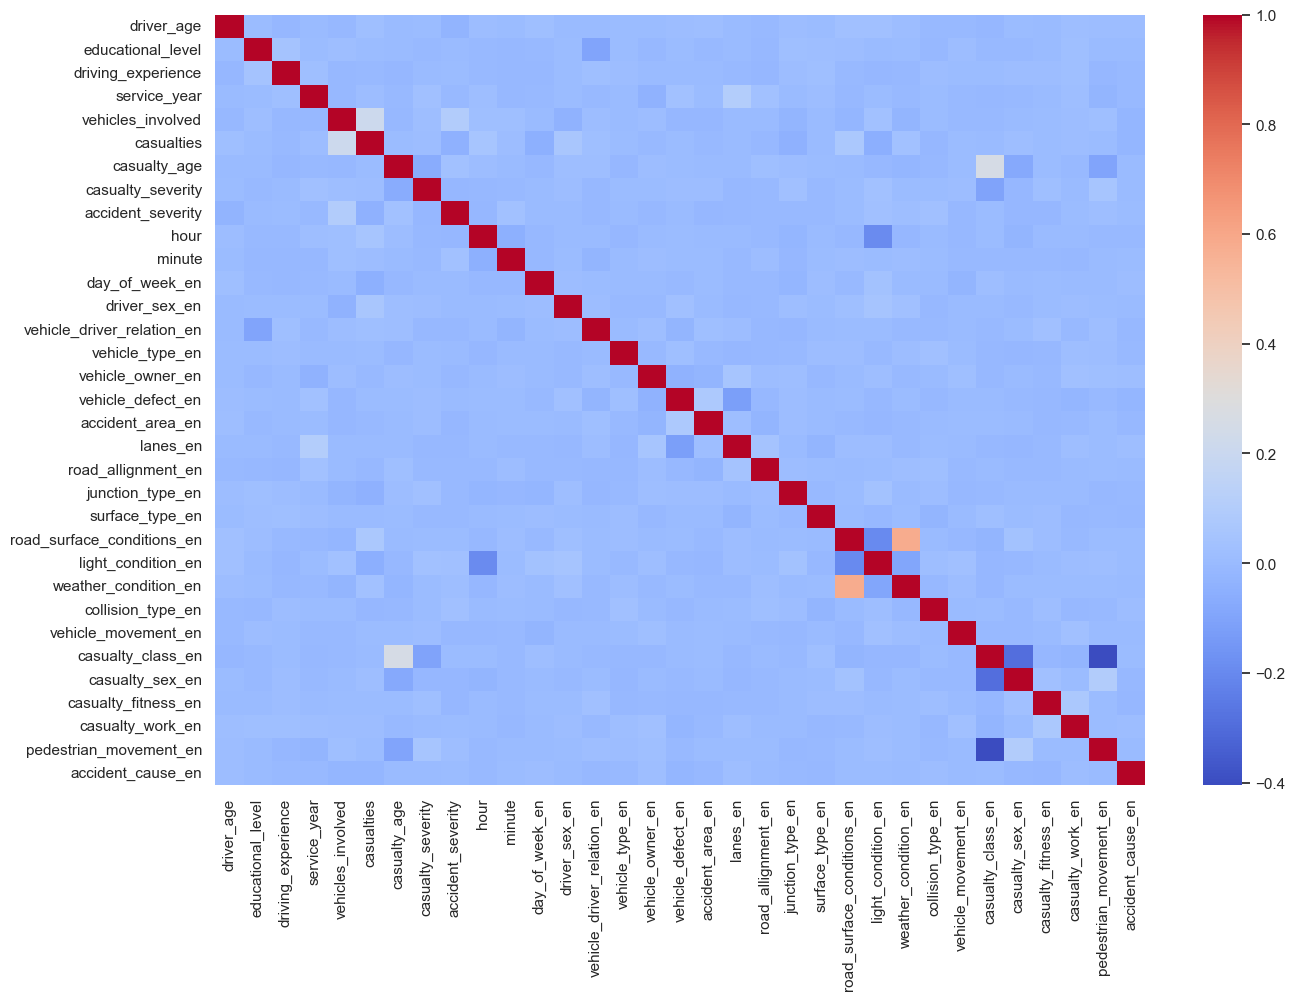

In [584]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),cmap="coolwarm")


# Preprocessing

### <i>Data Cleaning</i>

### <i>Data Integration</i>

### <i>Data Transformation</i>

### <i>Data Reduction</i>

### <i>Data Discretization and Concpet Heirarchy Generation</i>

# Insights and Recommendations